# Introduction

The world has gotten a lot smaller and it is a lot easier for people to travel the world and move to a new place. Many employers also require you to have international experience. The world has gotten a lot smaller and it is a lot easier for people to travel the world and move to a new place. Many employers also require you to have international experience. It can be hard though to get familiar with a big city and stay safe. The crime rate in the United States is most likely one of the highest in the developed world. According to Wikipedia, the total violent crime rate was 382.9 and total property crime rate was 2,362.2 per 100,000 population in 2017. Therefore, it is necessary to get information beforehand to see which areas are safe and which areas one should avoid. [https://en.wikipedia.org/wiki/Crime_in_the_United_States]. You want to have the best experience possible. The thing is that you need to find a place to live. Which neighborhood though!? Of course you want to move somewhere safe. It should also have great restaurants or bars to meet people.

The problem: Where in Austin should you move to, where neighborhoods are save and you have great venues?

# Data

I'm using the foursquare location data for top venues, similar to the New York and Toronto analysis. Additionally I downloaded the Austin Crime Report Data 2018 from https://data.austintexas.gov/Public-Safety/Crime-Reports-2018/vmn9-3bvu to make a crime heat map of Austin. I will also create graphics that show when most crimes appear and what type of crimes. The Crime Report Data includes longitude and latitude, is in .csv format, so it can easly be read in with pandas and merged with the foursquare location data. I will use the getNearbyVenues function from the labs to access Austin venues from foursquarre.

In [1]:
import pandas as pd

# read crime data from Austin as .csv file
crime_df = pd.read_csv("W:/Crime_Reports_2018.csv")
crime_df.head()

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,2.018365e+10,DEADLY CONDUCT,408,N,12/31/2018 23:54,12/31/2018,2354,12/31/2018 23:54,12/31/2018,2354,...,18.04,NaN,NaN,13A,Aggravated Assault,3125118.0,3125118.0,30.339849,-97.706618,"(30.33984945, -97.70661753)"
1,2.018365e+10,POSSESSION OF MARIJUANA,1803,N,12/31/2018 23:46,12/31/2018,2346,12/31/2018 23:46,12/31/2018,2346,...,1.01,C,1/1/2019,NaN,NaN,3110934.0,3110934.0,30.309252,-97.752412,"(30.30925222, -97.752412)"
2,2.018365e+10,FAMILY DISTURBANCE,3400,N,12/31/2018 23:32,12/31/2018,2332,12/31/2018 23:32,12/31/2018,2332,...,17.61,N,1/6/2019,NaN,NaN,3082798.0,3082798.0,30.391518,-97.839473,"(30.39151787, -97.83947264)"
3,2.018365e+10,ASSAULT WITH INJURY,900,N,12/31/2018 23:25,12/31/2018,2325,12/31/2018 23:44,12/31/2018,2344,...,21.12,N,1/21/2019,NaN,NaN,3132665.0,3132665.0,30.321537,-97.683190,"(30.32153667, -97.68318973)"
4,2.018365e+10,DATING DISTURBANCE,2400,N,12/31/2018 23:20,12/31/2018,2320,12/31/2018 23:47,12/31/2018,2347,...,12.00,N,1/27/2019,NaN,NaN,3108247.0,3108247.0,30.273213,-97.761890,"(30.2732126, -97.76188976)"


We can see the data has 27 columns with longitude and latitude.<br>
Let's look at the number and percentage of unique crimes that occured

In [2]:
crime_df.shape

(102631, 27)

# Data Analysis

### Crime Analysis

In [3]:
crimelist_df = pd.concat([crime_df['Highest Offense Description'].value_counts(), 
                          crime_df['Highest Offense Description'].value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))

In [4]:
crimelist_df.head(5)

,counts,percentage
FAMILY DISTURBANCE,10634,10.361392
BURGLARY OF VEHICLE,10516,10.246417
THEFT,9357,9.117128
CRIMINAL MISCHIEF,4643,4.523974
ASSAULT W/INJURY-FAM/DATE VIOL,3392,3.305044


We can see that family disturbance is the crime that occured the most followed by burglary of vehicle and theft. We also see assault with injury is high on the list.

Great about this data is that it also has the exact time and date when a crime occured. Let's look at when assaults with injuries occur. First let's see if there is a specific time of the year.

In [5]:
# Let's look at what class the date variable is
crime_df.dtypes

Incident Number                float64
Highest Offense Description     object
Highest Offense Code             int64
Family Violence                 object
Occurred Date Time              object
Occurred Date                   object
Occurred Time                    int64
Report Date Time                object
Report Date                     object
Report Time                      int64
Location Type                   object
Address                         object
Zip Code                       float64
Council District               float64
APD Sector                      object
APD District                    object
PRA                            float64
Census Tract                   float64
Clearance Status                object
Clearance Date                  object
UCR Category                    object
Category Description            object
X-coordinate                   float64
Y-coordinate                   float64
Latitude                       float64
Longitude                

In [6]:
# We need to convert "Report Time" and "Occured Date" to Date
print(pd.to_datetime(crime_df['Occurred Date'], format='%m/%d/%Y').min())
print(pd.to_datetime(crime_df['Report Date'], format='%m/%d/%Y').min())

2003-06-26 00:00:00
2018-01-01 00:00:00


We see that there are crimes in the data that occured in 2003, but got reported in 2018. We only want to look at crimes that occoured in 2018. So let's subset the data

In [8]:
crime_df['Occurred Date'] = pd.to_datetime(crime_df['Occurred Date'], format='%m/%d/%Y')
crime_df = crime_df[crime_df['Occurred Date'] >= "2018-01-01"]
crime_df.shape

(101090, 27)

We want to get the counts of the data by month and offense description. So first we need to make a variable that shows the month of the year

In [9]:
dates = pd.DatetimeIndex(crime_df['Occurred Date'])

In [10]:
crime_df['Month'] = dates.month

In [11]:
crime_df.head()

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,Month
0,2.018365e+10,DEADLY CONDUCT,408,N,12/31/2018 23:54,2018-12-31,2354,12/31/2018 23:54,12/31/2018,2354,...,NaN,NaN,13A,Aggravated Assault,3125118.0,3125118.0,30.339849,-97.706618,"(30.33984945, -97.70661753)",12
1,2.018365e+10,POSSESSION OF MARIJUANA,1803,N,12/31/2018 23:46,2018-12-31,2346,12/31/2018 23:46,12/31/2018,2346,...,C,1/1/2019,NaN,NaN,3110934.0,3110934.0,30.309252,-97.752412,"(30.30925222, -97.752412)",12
2,2.018365e+10,FAMILY DISTURBANCE,3400,N,12/31/2018 23:32,2018-12-31,2332,12/31/2018 23:32,12/31/2018,2332,...,N,1/6/2019,NaN,NaN,3082798.0,3082798.0,30.391518,-97.839473,"(30.39151787, -97.83947264)",12
3,2.018365e+10,ASSAULT WITH INJURY,900,N,12/31/2018 23:25,2018-12-31,2325,12/31/2018 23:44,12/31/2018,2344,...,N,1/21/2019,NaN,NaN,3132665.0,3132665.0,30.321537,-97.683190,"(30.32153667, -97.68318973)",12
4,2.018365e+10,DATING DISTURBANCE,2400,N,12/31/2018 23:20,2018-12-31,2320,12/31/2018 23:47,12/31/2018,2347,...,N,1/27/2019,NaN,NaN,3108247.0,3108247.0,30.273213,-97.761890,"(30.2732126, -97.76188976)",12


In [12]:
crime_month_df = pd.crosstab(crime_df['Highest Offense Description'],crime_df['Month'])

We can look at the 5 top crimes (by count) from earlier

In [13]:
crime_top_df = crime_month_df.loc[crimelist_df.head().index,]
crime_top_df

Month,1,2,3,4,5,6,7,8,9,10,11,12
FAMILY DISTURBANCE,832,777,891,928,956,949,920,929,898,819,849,884
BURGLARY OF VEHICLE,720,595,812,782,663,840,873,941,996,1177,1040,1016
THEFT,747,707,779,710,720,769,735,791,759,835,775,747
CRIMINAL MISCHIEF,348,321,385,390,403,434,423,400,380,347,390,391
ASSAULT W/INJURY-FAM/DATE VIOL,233,246,285,304,304,309,285,310,293,257,270,278


In [14]:
# import matplotlib to show crime count of the 2018
import matplotlib.pyplot as plt

x = crime_top_df.columns
y_1 = crime_top_df.loc["FAMILY DISTURBANCE",]
y_2 = crime_top_df.loc["BURGLARY OF VEHICLE",]
y_3 = crime_top_df.loc["THEFT",]
y_4 = crime_top_df.loc["CRIMINAL MISCHIEF",]
y_5 = crime_top_df.loc["ASSAULT W/INJURY-FAM/DATE VIOL",]

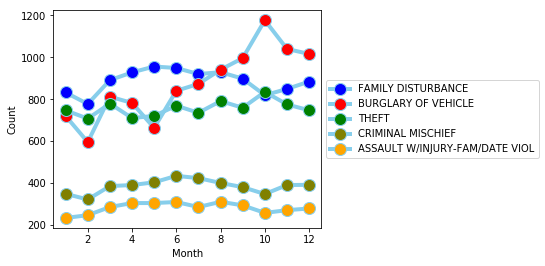

In [15]:
fig = plt.figure()
ax = plt.subplot(111)

ax.plot( x, y_1, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
ax.plot( x, y_2, marker='o', markerfacecolor='red', markersize=12, color='skyblue', linewidth=4)
ax.plot( x, y_3, marker='o', markerfacecolor='green', markersize=12, color='skyblue', linewidth=4)
ax.plot( x, y_4, marker='o', markerfacecolor='olive', markersize=12, color='skyblue', linewidth=4)
ax.plot( x, y_5, marker='o', markerfacecolor='orange', markersize=12, color='skyblue', linewidth=4)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel("Count")
plt.xlabel("Month")

plt.show()

fig.savefig('W:/line.jpg')

Burglary of Vehicles seemed to peak in October and seemed to be less in the early month of the year

Let's see if there is a specific time of the day when crimes occur

In [16]:
crime_df['Occurred Date Time'] = crime_df['Occurred Date Time'].apply(lambda x : pd.to_datetime(str(x)))

In [17]:
import datetime as dt
crime_df['Occurred_Time'] = crime_df['Occurred Date Time'].dt.time

In [18]:
crime_time_df = crime_df.groupby(crime_df["Occurred Date Time"].dt.hour).size()

Text(0.5, 0, 'Hour of Day')

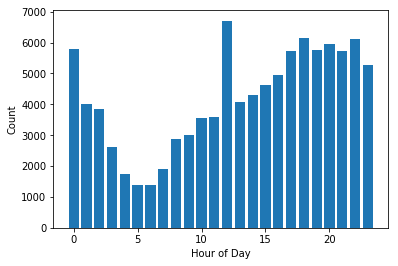

In [19]:
plt.bar(crime_time_df.index,crime_time_df)
plt.ylabel('Count')
plt.xlabel('Hour of Day')

Interestingly there is a spike in crimes at 12 pm and it seems to increase until midnight, until it starts decreasing and hits its lowest count around 5am.

Next let's look at a map of Austin to see if crimes is concentrated at a specific area

We will create a heatmap of Austin that shows where most crimes are concentrated. We will use package gmplot for that

In [20]:
import folium
from folium import plugins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
m = folium.Map([30.267153, -97.7430608], zoom_start=12)
m

In [22]:
crime_map_df = crime_df[['Latitude','Longitude','Address','Highest Offense Description']]

# Since data is very big, let's subset the data to only assault with injury and burglary of vehicle
top_2 = ["ASSAULT W/INJURY-FAM/DATE VIOL","BURGLARY OF VEHICLE"]
crime_map_df = crime_map_df[crime_map_df['Highest Offense Description'].isin(top_2)]

crime_map_df_nona = crime_map_df.dropna()
crime_map_df_nona = crime_map_df_nona[0:1000]
crime_map_df_nona.shape

(1000, 4)

In [23]:
# mark each station as a point
for index, row in crime_map_df_nona.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']],
                        radius=2,
                        popup=row['Address'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

In [24]:
# convert to (n, 2) nd-array format for heatmap
stationArr = crime_map_df_nona[['Latitude', 'Longitude']].as_matrix()
stationArr = stationArr.tolist()

# plot heatmap
m.add_children(plugins.HeatMap(stationArr, radius=12))
m

C:\Users\goros\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\goros\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  


The limitation here is that the map only displayed for 1000 rows of the data. This is a limitation of the computing power of my computer. It seems though that most crime was concentrated in the center and then at the very south of Austin. Keep in mind that this data is only for 2018. Just south and west of the Colorado River seemed to be an okay area in regards to crime. When you zoom in, you can see the road names. So let's pick the area on Barton Springs Rd to find interesting venues.

### Foursquare Data

In [25]:
import requests # library to handle requests
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
from pandas.io.json import json_normalize

with open("W:/foursquare.txt","r") as f:
    content = f.read().splitlines()

CLIENT_ID = content[0] # your Foursquare ID
CLIENT_SECRET = content[1] # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 30

Let's find coordinates for Barton Springs Rd, Austin, TX

In [26]:
address = 'Barton Springs Rd, Austin, TX'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

30.2587707 -97.7479881


And find an apartment around this area

In [27]:
# Same code what we did in the labs

search_query = 'Apartments'
radius = 500
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url
results = requests.get(url).json()
results

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

Apartments .... OK!


,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",False,4dead90788774880e32882f2,222 E Riverside Dr,US,Austin,United States,South Congress,578,"[222 E Riverside Dr (South Congress), Austin, ...","[{'label': 'display', 'lat': 30.2560275, 'lng'...",30.256027,-97.742883,78704,TX,SoCo Apartments On The Lake,v-1565353791,NaN
1,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",False,4d3cfb85fb4c54819a6ad914,500 Congress Ave,US,Austin,United States,NaN,152,"[500 Congress Ave, Austin, TX 78701, United St...","[{'label': 'display', 'lat': 30.25740136890664...",30.257401,-97.747867,78701,TX,Congress Square Apartments,v-1565353791,NaN
2,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",False,4b67e49ef964a5206b602be3,614 S 1st St,US,Austin,United States,Barton Springs,450,"[614 S 1st St (Barton Springs), Austin, TX 787...","[{'label': 'display', 'lat': 30.25674011599587...",30.256740,-97.752039,78704,TX,Timbercreek Apartments,v-1565353791,90490005
3,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",False,579b91c9498eb9369b1dbecb,422 W Riverside Dr,US,Austin,United States,S 1st Street,124,"[422 W Riverside Dr (S 1st Street), Austin, TX...","[{'label': 'display', 'lat': 30.259674, 'lng':...",30.259674,-97.748756,78704,TX,422 At The Lake,v-1565353791,223049788
4,[],False,4de7f51a7d8b1f2dd2a50870,614 S 1st St,US,Austin,United States,NaN,449,"[614 S 1st St, Austin, TX 78704, United States]","[{'label': 'display', 'lat': 30.25683413117821...",30.256834,-97.752087,78704,TX,Timber Creek Apartments Pool,v-1565353791,NaN


In [28]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,SoCo Apartments On The Lake,Residential Building (Apartment / Condo),222 E Riverside Dr,US,Austin,United States,South Congress,578,"[222 E Riverside Dr (South Congress), Austin, ...","[{'label': 'display', 'lat': 30.2560275, 'lng'...",30.256027,-97.742883,78704,TX,4dead90788774880e32882f2
1,Congress Square Apartments,Residential Building (Apartment / Condo),500 Congress Ave,US,Austin,United States,NaN,152,"[500 Congress Ave, Austin, TX 78701, United St...","[{'label': 'display', 'lat': 30.25740136890664...",30.257401,-97.747867,78701,TX,4d3cfb85fb4c54819a6ad914
2,Timbercreek Apartments,Residential Building (Apartment / Condo),614 S 1st St,US,Austin,United States,Barton Springs,450,"[614 S 1st St (Barton Springs), Austin, TX 787...","[{'label': 'display', 'lat': 30.25674011599587...",30.256740,-97.752039,78704,TX,4b67e49ef964a5206b602be3
3,422 At The Lake,Residential Building (Apartment / Condo),422 W Riverside Dr,US,Austin,United States,S 1st Street,124,"[422 W Riverside Dr (S 1st Street), Austin, TX...","[{'label': 'display', 'lat': 30.259674, 'lng':...",30.259674,-97.748756,78704,TX,579b91c9498eb9369b1dbecb
4,Timber Creek Apartments Pool,None,614 S 1st St,US,Austin,United States,NaN,449,"[614 S 1st St, Austin, TX 78704, United States]","[{'label': 'display', 'lat': 30.25683413117821...",30.256834,-97.752087,78704,TX,4de7f51a7d8b1f2dd2a50870
5,Crescent Austin,Residential Building (Apartment / Condo),127 E Riverside Dr,US,Austin,United States,Congress,414,"[127 E Riverside Dr (Congress), Austin, TX 787...","[{'label': 'display', 'lat': 30.2555472, 'lng'...",30.255547,-97.745829,78704,TX,50f35144e4b0af5beeb93d35


It didn't return any apartment on Barton Springs Rd, but the cross street of Timbercreek Apartments is Barton Springs. Let's explore how ratings and tips are from the apartments.

In [29]:
for vid in dataframe_filtered.id:
    venue_id = vid # ID of Apartment
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()        
    try:
        print(dataframe_filtered[dataframe_filtered.id==vid].name.to_string())
        print(result['response']['venue']['rating'])
        print("")
    except:
        print(dataframe_filtered[dataframe_filtered.id==vid].name.to_string())
        print('This venue has not been rated yet.')
        print("")

0    SoCo Apartments On The Lake
0    SoCo Apartments On The Lake
This venue has not been rated yet.

1    Congress Square Apartments
1    Congress Square Apartments
This venue has not been rated yet.

2    Timbercreek Apartments
2    Timbercreek Apartments
This venue has not been rated yet.

3    422 At The Lake
3    422 At The Lake
This venue has not been rated yet.

4    Timber Creek Apartments  Pool
4    Timber Creek Apartments  Pool
This venue has not been rated yet.

5    Crescent Austin
5    Crescent Austin
This venue has not been rated yet.



Seems that none of the apartments have been rated yet, but some have some tips. Let's take a closer look at the Timbercreek Apartments.

In [30]:
venue_id = '4b67e49ef964a5206b602be3'
limit = 15 # set limit to be greater than or equal to the total number of tips
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
results

tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
tip.keys()

pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) # json normalize tips

# columns to keep
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.gender', 'user.id']
tips_filtered = tips_df.loc[:, filtered_columns]

# display tips
tips_filtered

C:\Users\goros\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.gender,user.id
0,They require an application from every person (at $50 a head) even if they're not going to be on the lease,0,0,4e53b0e6c65bea7986d5e8ad,Tracy,NaN,female,2500282


So let's explore what's around Timbercreek Apartments

In [31]:
import requests
latitude = 30.256740
longitude = -97.752039
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url
results = requests.get(url).json()
items = results['response']['groups'][0]['items']
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Sandy's Hamburgers,Burger Joint,603 Barton Springs Rd,US,Austin,United States,at S. 1st St.,214,"[603 Barton Springs Rd (at S. 1st St.), Austin, TX 78704, United States]","[{'label': 'display', 'lat': 30.258432255748897, 'lng': -97.75098242876527}]",30.258432,-97.750982,NaN,78704,TX,4a4a4d21f964a520abab1fe3
1,Auditorium Shores at Lady Bird Lake,Park,800 W. Riverside Dr.,US,Austin,United States,NaN,447,"[800 W. Riverside Dr., Austin, TX 78704, United States]","[{'label': 'display', 'lat': 30.259792212638185, 'lng': -97.74901258927403}]",30.259792,-97.749013,NaN,78704,TX,4a1f1b1ef964a520087c1fe3
2,Sandy's Frozen Custard & Root Beer,Ice Cream Shop,124 Parmer,US,Austin,United States,NaN,216,"[124 Parmer, Austin, TX 78704, United States]","[{'label': 'display', 'lat': 30.258442451422372, 'lng': -97.75094659991677}]",30.258442,-97.750947,NaN,78704,TX,4a468bcdf964a52013a91fe3
3,Terry Black's BBQ,BBQ Joint,1003 Barton Springs Rd,US,Austin,United States,btwn Dawson Rd & Bouldin Ave,446,"[1003 Barton Springs Rd (btwn Dawson Rd & Bouldin Ave), Austin, TX 78704, United States]","[{'label': 'display', 'lat': 30.25986, 'lng': -97.75496}]",30.259860,-97.754960,NaN,78704,TX,533efc4d498e3775c831b2ee
4,Long Center,Performing Arts Venue,701 W Riverside Dr,US,Austin,United States,South 1st St,465,"[701 W Riverside Dr (South 1st St), Austin, TX 78704, United States]","[{'label': 'display', 'lat': 30.260742345179793, 'lng': -97.75064911658087}]",30.260742,-97.750649,NaN,78704,TX,4abb007bf964a520828320e3
5,Stitch Lab,Arts & Crafts Store,1000 S 1st St,US,Austin,United States,NaN,307,"[1000 S 1st St, Austin, TX 78704, United States]","[{'label': 'display', 'lat': 30.254105776842383, 'lng': -97.75299196139234}]",30.254106,-97.752992,NaN,78704,TX,4b6f5669f964a52018ec2ce3
6,Rollins Theatre,Indie Movie Theater,701 W Riverside Dr,US,Austin,United States,NaN,405,"[701 W Riverside Dr, Austin, TX 78704, United States]","[{'label': 'display', 'lat': 30.2601642048432, 'lng': -97.7505972946742}]",30.260164,-97.750597,NaN,78704,TX,4d6e9e21451c41bd86072845
7,Maximum FX,Salon / Barbershop,1007 S Congress Ave Ste 10C,US,Austin,United States,Riverside,499,"[1007 S Congress Ave Ste 10C (Riverside), Austin, TX 78704, United States]","[{'label': 'display', 'lat': 30.254177734381187, 'lng': -97.74777418997266}]",30.254178,-97.747774,NaN,78704,TX,4b2d0094f964a52023cc24e3
8,Zax Pints & Plates,Bar,312 Barton Springs Rd,US,Austin,United States,at Riverside Dr.,425,"[312 Barton Springs Rd (at Riverside Dr.), Austin, TX 78704, United States]","[{'label': 'display', 'lat': 30.258903049668064, 'lng': -97.74839486871718}]",30.258903,-97.748395,NaN,78704,TX,49ef8ed8f964a520cc681fe3
9,Ego's Lounge,Karaoke Bar,510 S Congress Ave,US,Austin,United States,at Riverside Dr.,443,"[510 S Congress Ave (at Riverside Dr.), Austin, TX 78704, United States]","[{'label': 'display', 'lat': 30.256592068007198, 'lng': -97.74742554263229}]",30.256592,-97.747426,NaN,78704,TX,40ec8e80f964a5202c0a1fe3


So there is a good mix around the apartment. Bars, movie theater, barbershop, arts venue, a park and places to eat.

Let's visualize it on the map

In [32]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Timbercreek Apartments


# add Ecco as a red circle mark
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Timbercreek Apartments',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

Now that we picked a neighborhood in Austin, let's see if we can split Austin into defining clusters. That would help us to find areas for specfic sparetime activities.

In [33]:
austin_df = [["Downtown Austin",30.2729,-97.7444],["South Austin",30.2030,-97.8067],["North Austin",30.3923,-97.7082],["East Austin",30.2655,-97.7091]]
austin_df = pd.DataFrame(austin_df, columns = ["Neighborhood","Latitude","Longitude"])
austin_df

,Neighborhood,Latitude,Longitude
0,Downtown Austin,30.2729,-97.7444
1,South Austin,30.2030,-97.8067
2,North Austin,30.3923,-97.7082
3,East Austin,30.2655,-97.7091


I use the function from the lab

In [34]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [35]:
austin_venues = getNearbyVenues(names=austin_df['Neighborhood'],
                                   latitudes=austin_df['Latitude'],
                                   longitudes=austin_df['Longitude']
                                  )
austin_venues.groupby('Neighborhood').count()

Downtown Austin
South Austin
North Austin
East Austin


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Downtown Austin,30,30,30,30,30,30
East Austin,2,2,2,2,2,2
North Austin,13,13,13,13,13,13
South Austin,21,21,21,21,21,21


In [36]:
# Show first 5 rows of Downtown Austin results
austin_venues[austin_venues.Neighborhood=="Downtown Austin"].head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown Austin,30.2729,-97.7444,Texas Capitol Grounds,30.273893,-97.740607,Field
1,Downtown Austin,30.2729,-97.7444,Chi'lantro BBQ,30.270052,-97.742686,Food Truck
2,Downtown Austin,30.2729,-97.7444,Perry's Steakhouse,30.269374,-97.743676,Steakhouse
3,Downtown Austin,30.2729,-97.7444,Texas State Capitol,30.274386,-97.740421,Capitol Building
4,Downtown Austin,30.2729,-97.7444,Caffé Medici,30.270119,-97.742154,Coffee Shop


In [37]:
# Show first 5 rows of South Austin results
austin_venues[austin_venues.Neighborhood=="South Austin"].head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
30,South Austin,30.203,-97.8067,City Nails,30.203370,-97.807461,Cosmetics Shop
31,South Austin,30.203,-97.8067,Casa Garcia's Mexican Restaurant,30.202230,-97.806379,Mexican Restaurant
32,South Austin,30.203,-97.8067,Sprouts Farmers Market,30.202448,-97.808276,Grocery Store
33,South Austin,30.203,-97.8067,Hao Hao Restaurant,30.201455,-97.805544,Chinese Restaurant
34,South Austin,30.203,-97.8067,CVS pharmacy,30.201689,-97.806774,Pharmacy


Let's analyze each neighborhood and see if we can create clusters

In [38]:
# one hot encoding
austin_onehot = pd.get_dummies(austin_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
austin_onehot['Neighborhood'] = austin_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [austin_onehot.columns[-1]] + list(austin_onehot.columns[:-1])
austin_onehot = austin_onehot[fixed_columns]

austin_onehot.head()
austin_grouped = austin_onehot.groupby('Neighborhood').mean().reset_index()
austin_grouped

,Neighborhood,American Restaurant,Art Museum,Arts & Crafts Store,Bagel Shop,Bank,Boutique,Bus Station,Business Service,Café,...,Pizza Place,Restaurant,Sandwich Place,Spa,Steakhouse,Sushi Restaurant,Taco Place,Thai Restaurant,Vacation Rental,Wine Shop
0,Downtown Austin,0.033333,0.033333,0.033333,0.033333,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.033333,0.000000,0.000000,0.066667,0.033333,0.000000,0.033333,0.033333,0.033333
1,East Austin,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.5,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,North Austin,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.076923,0.076923,0.0,...,0.000000,0.000000,0.076923,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000
3,South Austin,0.000000,0.000000,0.000000,0.000000,0.095238,0.0,0.000000,0.000000,0.0,...,0.095238,0.000000,0.000000,0.047619,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000


In [40]:
import numpy as np
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = austin_grouped['Neighborhood']

for ind in np.arange(austin_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(austin_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Austin,Hotel,Steakhouse,Capitol Building,Coffee Shop,Movie Theater,Wine Shop,Mexican Restaurant,Art Museum,Arts & Crafts Store,Bagel Shop
1,East Austin,Boutique,Café,Wine Shop,Comedy Club,Food Truck,Field,Fast Food Restaurant,Event Service,Donut Shop,Design Studio
2,North Austin,Fast Food Restaurant,Bus Station,Middle Eastern Restaurant,Intersection,IT Services,Business Service,Pharmacy,Home Service,Sandwich Place,Deli / Bodega
3,South Austin,Pizza Place,Convenience Store,Mexican Restaurant,Bank,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Grocery Store,Pharmacy,Event Service


We can see that Downtown's most common venue is hotels, East Austin Botique's and North and South Austin seem to have a lot of restaurants. Let's do a cluster analysis on Austin's neighborhoods.

### Cluster Analysis

In [41]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

austin_grouped_clustering = austin_grouped.drop('Neighborhood', 1)

Let's find the optimal number of clusters. I will use the "elbow method". The plot looks like and arm and the optimal k is where the elbow is.

In [42]:
Sum_of_squared_distances = []
K = range(1,5)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(austin_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

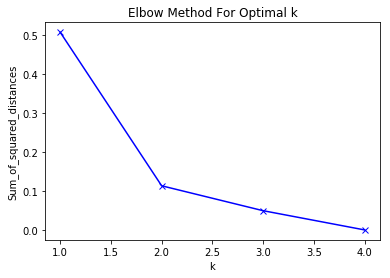

In [43]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

According to the plot, k = 2 indicates the optimal k.

In [44]:
# set number of clusters
kclusters = 2

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(austin_grouped_clustering)

In [45]:

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 0, 0])

In [46]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

austin_merged = austin_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
austin_merged = austin_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

austin_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Austin,30.2729,-97.7444,0,Hotel,Steakhouse,Capitol Building,Coffee Shop,Movie Theater,Wine Shop,Mexican Restaurant,Art Museum,Arts & Crafts Store,Bagel Shop
1,South Austin,30.2030,-97.8067,0,Pizza Place,Convenience Store,Mexican Restaurant,Bank,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Grocery Store,Pharmacy,Event Service
2,North Austin,30.3923,-97.7082,0,Fast Food Restaurant,Bus Station,Middle Eastern Restaurant,Intersection,IT Services,Business Service,Pharmacy,Home Service,Sandwich Place,Deli / Bodega
3,East Austin,30.2655,-97.7091,1,Boutique,Café,Wine Shop,Comedy Club,Food Truck,Field,Fast Food Restaurant,Event Service,Donut Shop,Design Studio


Looking at the results of the cluster analysis, it seems we have 1 cluster (including Downtown Austin, South Austin and North Austin) that stands for hotels and restaurants and the 2nd cluster consists of East Austin where you have Boutiques and cafe's etc.

# Results and Discussion

Analyzing the crime data of Austin in 2018 I concluded that the area just south of the Colorado river was a safe area to live. I therefore explored the neighborhood around Barton Spring Rd, Austin, TX. Using Foursquare data and using a radius of 500 meters, I received a list of 6 apartments. Unfortunately, using another Foursquare data search for ratings about these apartments did not provide any results and therefore did not narrow down my search. I picked the apartment complex “Timbercreek Apartments”, which did not limit my further analysis, since all apartments were in the same area. Pulling venue data from Foursquare gave me an idea of what venues and venue categories are around the apartment complex. Bars, movie theaters, places to eat and a park were all close by, which fulfills all needs for someone who moves to a new city. Last, I conducted cluster analysis of several neighborhoods in Austin. I found that I could split Austin into two clusters. One cluster included Downtown Austin, South Austin and North Austin. Hotels and restaurants mostly defined this cluster. The other cluster included East Austin. This neighborhood embodied mostly boutiques and cafes.

Crime analysis was limited by the fact that I could not plot more than 1000 data points on the map due to a computing power of my computer. Re-running the analysis with a more powerful computer might show a different image of the crime heat map. I could have also limited the crime analysis to a specific crime or broken it up by crime type. Furthermore, the crime data was only for 2018, which limits the decision-making. Crime hot spots can change over time and therefore could be different in the future, meaning that the area around Barton Springs Rd could become more dangerous. I also did not take into account affordability of the apartment and proximity to work place. These factors could be included in the analysis to make a clearer decision where to move.

# Conclusion

With my analysis, I gave an overview over how to use crime data and data from Foursquare to find an apartment in a safe area in Austin. I tried to “simplify” the problem of orientation in a big such as Austin. I’m sure it will benefit (young) employees or/and students to have good start in Austin.